# Import and process data

In [124]:
import numpy as np

In [125]:
import pandas as pd

# Load the data
# data = pd.read_csv('TEST')
# data = pd.read_csv('events_HK_with_date.csv')
# data = pd.read_csv('events_HK_2015_2020_test.csv')
data = pd.read_csv('events_HK_with_isroot.csv')
# data = pd.read_csv('events_HK_processed_18.csv')
# data = pd.read_csv('events_FR_SP_AG_L_YM_processed.csv')

# Display the first few rows of the dataframe
data.head()

,country_code_encoded_index,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,NumMentions,Contains14sub,Contains14,country_code_encoded,Year,Month,DayOfMonth
0,0,2015-02-19,141,3,-6.5,-3.543307,1,1,1,0,0,2015,2,19
1,0,2015-02-20,141,3,-6.5,-4.782609,2,2,1,0,0,2015,2,20
2,0,2015-02-21,141,3,-6.5,-2.558272,10,10,1,0,0,2015,2,21
3,0,2015-02-22,141,3,-6.5,-2.702703,10,10,1,0,0,2015,2,22
4,0,2015-02-23,141,3,-6.5,-8.160237,10,10,1,0,0,2015,2,23


In [126]:
# data = data.drop(columns=['Contains14sub', 'EventCode'])
# data.rename(columns={'Contains14': 'lag_fut_Contains14 1'}, inplace=True)
# data['AvgTone'].value_counts()

In [127]:
# data = data.drop(columns=['Contains14sub', 'ActionGeo_CountryCode', 'EventCode'])
# data.rename(columns={'Contains14': 'lag_fut_Contains14 1'}, inplace=True)
# # # data['AvgTone'].value_counts()

In [128]:
data = data.drop(columns=['Contains14sub', 'EventCode', 'country_code_encoded_index', 'NumMentions', 'country_code_encoded'])
data.rename(columns={'Contains14': 'lag_fut_Contains14 1'}, inplace=True)
# # data['AvgTone'].value_counts()

In [129]:
data.value_counts('lag_fut_Contains14 1')

lag_fut_Contains14 1
0    1750
1     394
dtype: int64

In [154]:
#  define a window in the future to predict
Days_in_future = 1

In [155]:


target_name = 'will_be_1_anytime_next_'+str(Days_in_future)+'_days'
# Create a rolling window of 7 days and check if there's any 1 in 'lag_fut_Contains14 1' column within this window
data[target_name] = data['lag_fut_Contains14 1'].rolling(window=Days_in_future, min_periods=1).apply(lambda x: 1 if x.sum() > 0 else 0)

# Shift the 'will_be_1_anytime_next_week' column up by 1 place
data[target_name] = data[target_name].shift(-1)

# Replace NaN values with 0
# data[target_name].fillna(0, inplace=True)
data.dropna(inplace=True)


# Convert the new column to integers
data[target_name] = data[target_name].astype(int)

# Display the first few rows of the dataframe
data.head(10)

,SQLDATE,QuadClass,GoldsteinScale,AvgTone,NumArticles,lag_fut_Contains14 1,Year,Month,DayOfMonth,will_be_1_anytime_next_1_days,will_be_1_anytime_next_2_days
0,2015-02-19,3,-6.5,-3.543307,1,0,2015,2,19,0,0
1,2015-02-20,3,-6.5,-4.782609,2,0,2015,2,20,0,0
2,2015-02-21,3,-6.5,-2.558272,10,0,2015,2,21,0,0
3,2015-02-22,3,-6.5,-2.702703,10,0,2015,2,22,0,0
4,2015-02-23,3,-6.5,-8.160237,10,0,2015,2,23,0,0
5,2015-02-24,3,-6.5,0.471698,8,0,2015,2,24,0,0
6,2015-02-25,3,-6.5,-1.157407,1,0,2015,2,25,0,0
7,2015-02-26,3,-6.5,0.000000,2,0,2015,2,26,0,0
8,2015-02-27,3,-6.5,1.648805,6,0,2015,2,27,0,0
9,2015-02-28,3,-6.5,1.648805,6,0,2015,2,28,1,1


In [156]:
# Define lookback and buffer window
#  Units are number of days
window_gap = 0
lookback = 10

In [157]:
def rolling(df, lookback_lag_target, roll_range):
    df_lag = df.copy()
    # Create lagged features
    for lag in lookback_lag_target:
        df_lag[f'lag_{lag}'] = df_lag[target_name].shift(lag)
        # df_lag[f'lagGoldstein_{lag}'] = df_lag['GoldsteinScale'].shift(lag)
        # df_lag[f'lagAvgTone_{lag}'] = df_lag['AvgTone'].shift(lag)
        # df_lag[f'lagNumArticles_{lag}'] = df_lag['NumArticles'].shift(lag)
        # df_lag[f'lagNumMentions_{lag}'] = df_lag['NumMentions'].shift(lag)
        # df[f'lagQuadClass_{lag}'] = df['QuadClass'].shift(lag)
#     drop columns that refer to same day data
    
    # columns_to_drop = ['GoldsteinScale', 'AvgTone', 'NumArticles', 'NumMentions', 'QuadClass', 'lag_fut_Contains14 1']
    columns_to_drop = ['GoldsteinScale', 'AvgTone', 'NumArticles', 'QuadClass', 'lag_fut_Contains14 1']
    
    df_removed=df_lag.copy()
    df_removed = df_removed.drop(columns_to_drop, axis=1)
    df = df_removed.copy()
    # roll_range = [1]  # Specify the desired lookback periods

    roll_mean_features = pd.DataFrame()
    roll_mean_features['will_be_1_anytime_next_week_lag'] = df_removed[target_name].shift(min(lookback_lag_target))
    roll_mean_features = [roll_mean_features['will_be_1_anytime_next_week_lag'].rolling(roll).mean() for roll in roll_range]
    roll_mean_columns = [f'roll_mean_{roll}' for roll in roll_range]
    roll_mean_df = pd.concat(roll_mean_features, axis=1)
    roll_mean_df.columns = roll_mean_columns

    df = pd.concat([df_removed, roll_mean_df], axis=1)

    return df


lookback_lag_target = range(window_gap+1,lookback+1)
roll_range = range(window_gap+1,lookback-1)
data_temp=data.copy()
data_process = rolling(data_temp, lookback_lag_target, roll_range)
data_process.dropna(inplace=True)

**IMPORTANT 1** - The minimum difference between lookback and window_gap should be 3. If it is less then no rolling mean features will be calculated and the code will crash.

**IMPORTANT 2** - The rolling mean is calculated starting at the smallest lag value defined.


Example - If we lag the target value from 2 to 6 (set lookback_lag_target = range(2,7)) then the earliest we can start caluclating the mean is 2 days before a specific time step. For example, 
to calcualte the rolling mean when the roll_range = 2, we move two rows before the target (now at t-2) and calculate the mean of the values at t-2 and t-3. This ensures we only use data 
from t-2 and before.

In [158]:
data_process.head(10)

,SQLDATE,Year,Month,DayOfMonth,will_be_1_anytime_next_1_days,will_be_1_anytime_next_2_days,lag_1,lag_2,lag_3,lag_4,...,lag_9,lag_10,roll_mean_1,roll_mean_2,roll_mean_3,roll_mean_4,roll_mean_5,roll_mean_6,roll_mean_7,roll_mean_8
10,2015-03-01,2015,3,1,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.5,0.333333,0.25,0.2,0.166667,0.142857,0.125
11,2015-03-02,2015,3,2,1,1,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.666667,0.50,0.4,0.333333,0.285714,0.250
12,2015-03-03,2015,3,3,0,1,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.000000,0.75,0.6,0.500000,0.428571,0.375
13,2015-03-04,2015,3,4,0,0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.5,0.666667,0.75,0.6,0.500000,0.428571,0.375
14,2015-03-05,2015,3,5,0,0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.333333,0.50,0.6,0.500000,0.428571,0.375
15,2015-03-06,2015,3,6,0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.000000,0.25,0.4,0.500000,0.428571,0.375
16,2015-03-07,2015,3,7,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.2,0.333333,0.428571,0.375
17,2015-03-08,2015,3,8,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.166667,0.285714,0.375
18,2015-03-09,2015,3,9,0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.142857,0.250
19,2015-03-10,2015,3,10,0,0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.125


In [159]:
data_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2131 entries, 10 to 2140
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SQLDATE                        2131 non-null   object 
 1   Year                           2131 non-null   int64  
 2   Month                          2131 non-null   int64  
 3   DayOfMonth                     2131 non-null   int64  
 4   will_be_1_anytime_next_1_days  2131 non-null   int64  
 5   will_be_1_anytime_next_2_days  2131 non-null   int64  
 6   lag_1                          2131 non-null   float64
 7   lag_2                          2131 non-null   float64
 8   lag_3                          2131 non-null   float64
 9   lag_4                          2131 non-null   float64
 10  lag_5                          2131 non-null   float64
 11  lag_6                          2131 non-null   float64
 12  lag_7                          2131 non-null   

In [160]:
import pandas as pd

# data_temp = data_process.copy()
# # Convert the 'date_column' to integers
# data_temp['SQLDATE'] = data_temp['SQLDATE'].str.replace("-", "").astype(int)

# data_temp.head()
# data_process = data_temp

# Classical models single country

In [161]:
# Define the feature columns
# feature_cols = [col for col in data_process.columns if 'lag_' in col or 'rolling_mean_' in col]
feature_cols = [col for col in data_process.columns if 'lag_' in col or 'roll_' in col or 'SQLDATE' in col]

# Define the target column
target_col = target_name

# Split the data into training and testing sets
train_size = int(len(data_process) * 0.85)
train_data = data_process[:train_size]
test_data = data_process[train_size:]

X_train = train_data[feature_cols]
# print(X_train.head())
y_train = train_data[target_col]
X_test_temp = test_data[feature_cols]
# y_test = test_data[target_col]

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Define the feature columns
# feature_cols = [col for col in data_process.columns if 'lag_' in col or 'rolling_mean_' in col]
feature_cols = [col for col in data_process.columns if 'lag_' in col or 'roll_' in col]

# Define the target column
target_col = target_name

# Split the data into training and testing sets
train_size = int(len(data_process) * 0.7)
train_data = data_process[:train_size]
test_data = data_process[train_size:]

X_train = train_data[feature_cols]
# print(X_train.head())
y_train = train_data[target_col]
X_test = test_data[feature_cols]
y_test = test_data[target_col]



scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
print(scale_pos_weight)
# Initialize classifiers
# classifiers = {
#     'Logistic Regression': LogisticRegression(random_state=42, class_weight = 'balanced'),
#     'SVM': SVC(kernel='linear', random_state=42, class_weight = 'balanced'), 
#     'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42, scale_pos_weight=scale_pos_weight),
#     # 'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
#      'RandomForest':RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
#     'XGBoost': XGBClassifier(eval_metric='logloss', n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight)
# }

classifiers = {
    # 'Logistic Regression': LogisticRegression(random_state=42, class_weight = 'balanced'),
    'SVM': SVC(kernel='linear', random_state=42, class_weight = 'balanced'), 
    # 'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42, scale_pos_weight=scale_pos_weight),
    # 'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
     # 'RandomForest':RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    # 'XGBoost': XGBClassifier(eval_metric='logloss', n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight)
}


# Fit each classifier, make predictions, and print results
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = clf.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Print results
    print(f"Classifier: {name}, F1 Score: {f1}, Accuracy: {acc}")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"Confusion Matrix for {name}: \n {cm}")


9.963235294117647
Classifier: SVM, F1 Score: 0.6679611650485436, Accuracy: 0.7328125
Confusion Matrix for SVM: 
 [[297  86]
 [ 85 172]]


In [163]:
# X_test

In [1]:
# import matplotlib.pyplot as plt
# df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
# df = df.reset_index(drop=True)
# X_test_temp = X_test_temp.reset_index(drop=True)
# df['Date'] = X_test_temp['SQLDATE']
# df['Date'] = pd.to_datetime(df['Date'].astype(str)).dt.strftime('%Y-%m-%d')
# # df.head()
# # Scatter plot using the 'Date' column for the x-axis
# plt.figure(figsize=(15,7))
# plt.scatter(df['Date'], df['True'], label='True', s=50)
# plt.scatter(df['Date'], df['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)
# plt.title('Scatter plot of Instances where True Value is 1')
# plt.ylabel('Value')
# plt.xlabel('Date')
# plt.yticks([0,1])
# plt.legend()
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()
# # plt.savefig('')


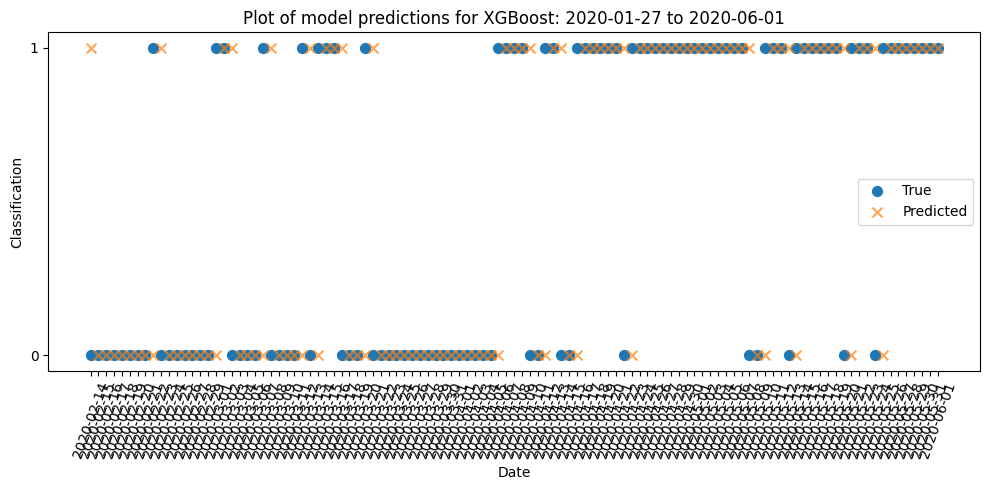

In [166]:
# Filter the DataFrame for the specified date range
start_date = '2020-01-27'
end_date = '2020-06-01'
df_filtered_date_range = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Scatter plot using the 'Date' column for the x-axis within the specified date range
plt.figure(figsize=(10,5))
plt.scatter(df_filtered_date_range['Date'], df_filtered_date_range['True'], label='True', s=50)
plt.scatter(df_filtered_date_range['Date'], df_filtered_date_range['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)



plt.title(f'Plot of model predictions for XGBoost: {start_date} to {end_date}')
plt.ylabel('Classification')
plt.xlabel('Date')
# plt.xticks(df_filtered_date_range['Date'])
plt.yticks([0,1])
plt.legend()
plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('XGBoost model prediction_back_3')
plt.savefig('model-predictions-2015-2020-HK')
plt.show()

In [85]:
# import matplotlib.pyplot as plt
# adjusted_date_range = pd.date_range(start='2020/11/21', periods=y_test.size, freq='D')

# # Update the dataframe to use the adjusted_date_range as its index
# df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
# # Add a new 'Date' column to the dataframe with the adjusted_date_range values
# df['Date'] = adjusted_date_range

# # Filter for instances where y_test is 1
# # df_filtered = df[df['True'] == 1]
# df_filtered = df




# # Scatter plot using the 'Date' column for the x-axis
# plt.figure(figsize=(15,7))
# plt.scatter(df_filtered['Date'], df_filtered['True'], label='True', s=50)
# plt.scatter(df_filtered['Date'], df_filtered['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)
# plt.title('Scatter plot of Instances where True Value is 1')
# plt.ylabel('Value')
# plt.xlabel('Date')
# plt.yticks([0,1])
# plt.legend()
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.show()
# plt.savefig('')


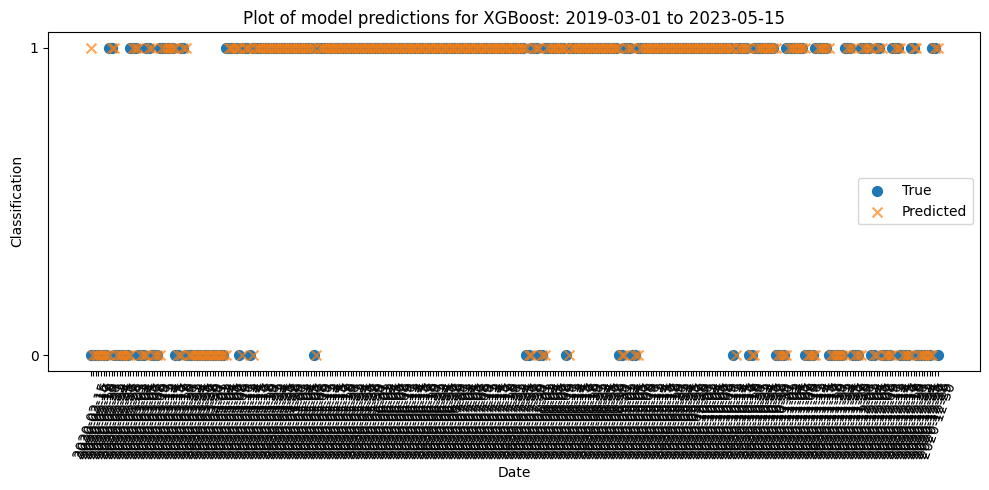

In [97]:
# Filter the DataFrame for the specified date range
start_date = '2019-03-01'
end_date = '2023-05-15'
df_filtered_date_range = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Scatter plot using the 'Date' column for the x-axis within the specified date range
plt.figure(figsize=(10,5))
plt.scatter(df_filtered_date_range['Date'], df_filtered_date_range['True'], label='True', s=50)
plt.scatter(df_filtered_date_range['Date'], df_filtered_date_range['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)



plt.title(f'Plot of model predictions for XGBoost: {start_date} to {end_date}')
plt.ylabel('Classification')
plt.xlabel('Date')
# plt.xticks(df_filtered_date_range['Date'])
plt.yticks([0,1])
plt.legend()
plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('XGBoost model prediction_back_3')
# plt.savefig('')
plt.show()

## Hyperparam tuning

In [228]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for each classifier
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_catboost = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'depth': [4, 6, 8]
}

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
}

# Create the parameter grid dictionary
param_grids = {
    'Logistic Regression': param_grid_lr,
    'SVM': param_grid_svm,
    'CatBoost': param_grid_catboost,
    'RandomForest': param_grid_rf,
    'XGBoost': param_grid_xgb
}

# Dictionary to store the best parameters for each classifier
best_params = {}
best_scores = {}

# Perform hyperparameter tuning for each classifier
for name, clf in classifiers.items():
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best hyperparameters and the associated best score
    best_params[name] = grid_search.best_params_
    best_scores[name] = grid_search.best_score_
    
    print(f"Classifier: {name}")
    print(f"Best Hyperparameters: {best_params[name]}")
    print(f"Best F1 Score: {best_scores[name]}\n")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Classifier: Logistic Regression
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best F1 Score: 0.10166666666666666

Classifier: SVM
Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score: 0.10166666666666666

Classifier: CatBoost
Best Hyperparameters: {'depth': 8, 'iterations': 50, 'learning_rate': 0.05}
Best F1 Score: 0.31841269841269837

Classifier: RandomForest
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best F1 Score: 0.27833472570314677



KeyboardInterrupt: 

## Feature importance

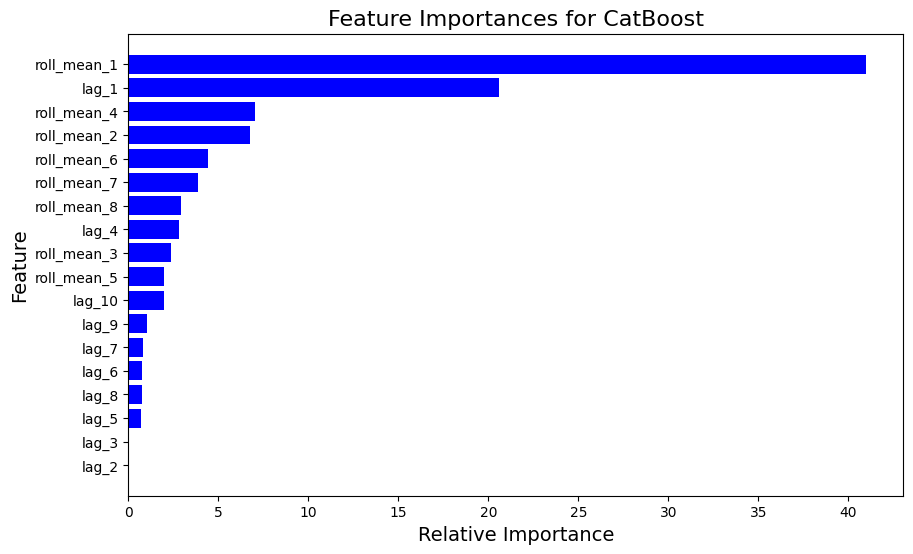

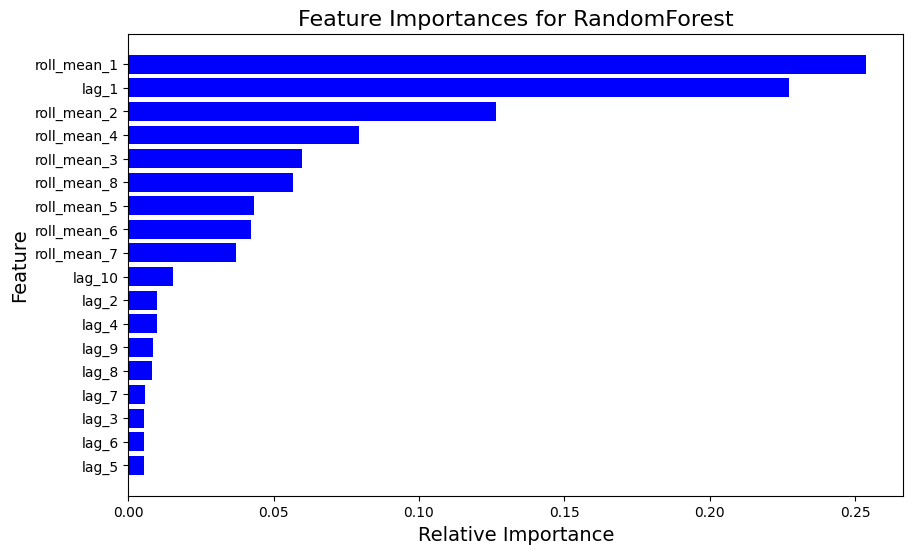

In [81]:
import matplotlib.pyplot as plt
# Get feature importances for CatBoost
catboost_clf = classifiers['CatBoost']
catboost_importances = catboost_clf.get_feature_importance()

# # Print feature importances for CatBoost
# print("\nCatBoost Feature Importances:")
# for feature_name, importance in zip(feature_cols, catboost_importances):
#     print(f"Feature: {feature_name}, Importance: {importance}")

# # Get feature importances for RandomForest
rf_clf = classifiers['RandomForest']
rf_importances = rf_clf.feature_importances_

# # Print feature importances for RandomForest
# print("\nRandomForest Feature Importances:")
# for feature_name, importance in zip(feature_cols, rf_importances):
#     print(f"Feature: {feature_name}, Importance: {importance}")
    


# Function to plot feature importances
def plot_feature_importances(importances, model_name):
    indices = np.argsort(importances)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances for {model_name}', fontsize=16)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_cols[i] for i in indices])
    plt.xlabel('Relative Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()

# Plot feature importances for CatBoost
plot_feature_importances(catboost_importances, "CatBoost")

# Plot feature importances for RandomForest
plot_feature_importances(rf_importances, "RandomForest")


# Classical models Multi country models

In [7]:
Days_in_future = 2
window_gap = 0
lookback = 10
target_name = 'will_be_1_anytime_next_' + str(Days_in_future) + '_days'

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Load the CSV file into a DataFrame
data = pd.read_csv('events_FR_SP_AG_L_YM_processed.csv')

# 2. Rename the 'Contains14' column and drop the unnecessary columns
data.rename(columns={'Contains14': 'lag_fut_Contains14 1'}, inplace=True)
data.drop(columns=['EventCode', 'Contains14sub'], inplace=True)

# 3. Label encode the 'ActionGeo_CountryCode' column
le = LabelEncoder()
data['ActionGeo_CountryCode'] = le.fit_transform(data['ActionGeo_CountryCode'])

    
# 4. Define the processing function to apply on grouped data
def process_grouped_data(group_data):
    # Days_in_future = 2
    # target_name = 'will_be_1_anytime_next_' + str(Days_in_future) + '_days'
    
    # Create a rolling window and check if there's any 1 in 'lag_fut_Contains14 1' column within this window
    group_data[target_name] = group_data['lag_fut_Contains14 1'].rolling(window=Days_in_future, min_periods=1).apply(lambda x: 1 if x.sum() > 0 else 0)
    
    # Shift the target column up by 1 place
    group_data[target_name] = group_data[target_name].shift(-1)
    
    # Handle NaN values and then convert the new column to integers
    group_data[target_name].fillna(0, inplace=True)
    group_data[target_name] = group_data[target_name].astype(int)
    
    # Define lookback and buffer window
    # window_gap = 0
    # lookback = 10

    df_lag = group_data.copy()
    
    # Create lagged features
    lookback_lag_target = range(window_gap+1, lookback+1)
    for lag in lookback_lag_target:
        df_lag[f'lag_{lag}'] = df_lag[target_name].shift(lag)
    
    # Drop some columns
    columns_to_drop = ['GoldsteinScale', 'AvgTone', 'NumArticles', 'lag_fut_Contains14 1']
    df_removed = df_lag.drop(columns=columns_to_drop, axis=1)
    
    roll_range = range(window_gap+1, lookback-1)
    roll_mean_features = pd.DataFrame()
    roll_mean_features['will_be_1_anytime_next_week_lag'] = df_removed[target_name].shift(min(lookback_lag_target))
    roll_mean_features = [roll_mean_features['will_be_1_anytime_next_week_lag'].rolling(roll).mean() for roll in roll_range]
    
    roll_mean_columns = [f'roll_mean_{roll}' for roll in roll_range]
    roll_mean_df = pd.concat(roll_mean_features, axis=1)
    roll_mean_df.columns = roll_mean_columns

    df = pd.concat([df_removed, roll_mean_df], axis=1)
    
    # Remove rows with NaN values
    df.dropna(inplace=True)
    return df

# 5. Group by 'ActionGeo_CountryCode' and apply the processing function
grouped_data = data.groupby('ActionGeo_CountryCode').apply(process_grouped_data)

# 6. Reset the index for the final dataframe
grouped_data.reset_index(drop=True, inplace=True)
data_process = grouped_data.copy()

In [9]:
data_process.head()

,SQLDATE,QuadClass,ActionGeo_CountryCode,will_be_1_anytime_next_2_days,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,...,lag_9,lag_10,roll_mean_1,roll_mean_2,roll_mean_3,roll_mean_4,roll_mean_5,roll_mean_6,roll_mean_7,roll_mean_8
0,20150301,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000
1,20150302,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000
2,20150303,3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000
3,20150304,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000
4,20150305,3,0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.5,0.333333,0.25,0.2,0.166667,0.142857,0.125


In [10]:
data_process['ActionGeo_CountryCode'].value_counts()

1    3016
3    3015
2    2731
0    2631
4    2403
Name: ActionGeo_CountryCode, dtype: int64

In [11]:
# Define the feature columns
# feature_cols = [col for col in data_process.columns if 'lag_' in col or 'rolling_mean_' in col]
feature_cols = [col for col in data_process.columns if 'lag_' in col or 'roll_' in col or 'SQLDATE' in col]

# Define the target column
target_col = target_name

# Split the data into training and testing sets
train_size = int(len(data_process) * 0.7)
train_data = data_process[:train_size]
test_data = data_process[train_size:]

X_train = train_data[feature_cols]
# print(X_train.head())
y_train = train_data[target_col]
X_test_temp = test_data[feature_cols]
# y_test = test_data[target_col]

In [14]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Define the feature columns
# feature_cols = [col for col in data_process.columns if 'lag_' in col or 'rolling_mean_' in col]
feature_cols = [col for col in data_process.columns if 'lag_' in col or 'roll_' in col or 'ActionGeo_CountryCode' in col]

# Define the target column
target_col = target_name

# Split the data into training and testing sets
train_size = int(len(data_process) * 0.7)
train_data = data_process[:train_size]
test_data = data_process[train_size:]

X_train = train_data[feature_cols]
# print(X_train.head())
y_train = train_data[target_col]
X_test = test_data[feature_cols]
y_test = test_data[target_col]



scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)
# print(scale_pos_weight)
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight = 'balanced'),
    'SVM': SVC(kernel='linear', random_state=42, class_weight = 'balanced'), 
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42, scale_pos_weight=scale_pos_weight),
    # 'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'RandomForest':RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='logloss', n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight)
}

# classifiers = {
    # 'Logistic Regression': LogisticRegression(random_state=42),
    # 'SVM': SVC(kernel='linear', random_state=42, class_weight = 'balanced'), 
    # 'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, silent=True, random_state=42, scale_pos_weight=scale_pos_weight),
    # 'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    # 'RandomForest':RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    # 'XGBoost': XGBClassifier(eval_metric='logloss', n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight)
# }


# Fit each classifier, make predictions, and print results
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict the target variable for the test data
    y_pred = clf.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Print results
    print(f"Classifier: {name}, F1 Score: {f1}, Accuracy: {acc}")

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"Confusion Matrix for {name}: \n {cm}")

Classifier: Logistic Regression, F1 Score: 0.6666666666666666, Accuracy: 0.9833293065957961
Confusion Matrix for Logistic Regression: 
 [[4001    0]
 [  69   69]]
Classifier: SVM, F1 Score: 0.5144927536231884, Accuracy: 0.9676250302005315
Confusion Matrix for SVM: 
 [[3934   67]
 [  67   71]]
Classifier: CatBoost, F1 Score: 0.366412213740458, Accuracy: 0.939840541193525
Confusion Matrix for CatBoost: 
 [[3818  183]
 [  66   72]]
Classifier: RandomForest, F1 Score: 0.37017994858611825, Accuracy: 0.9408069582024644
Confusion Matrix for RandomForest: 
 [[3822  179]
 [  66   72]]
Classifier: XGBoost, F1 Score: 0.3692307692307692, Accuracy: 0.9405653539502296
Confusion Matrix for XGBoost: 
 [[3821  180]
 [  66   72]]


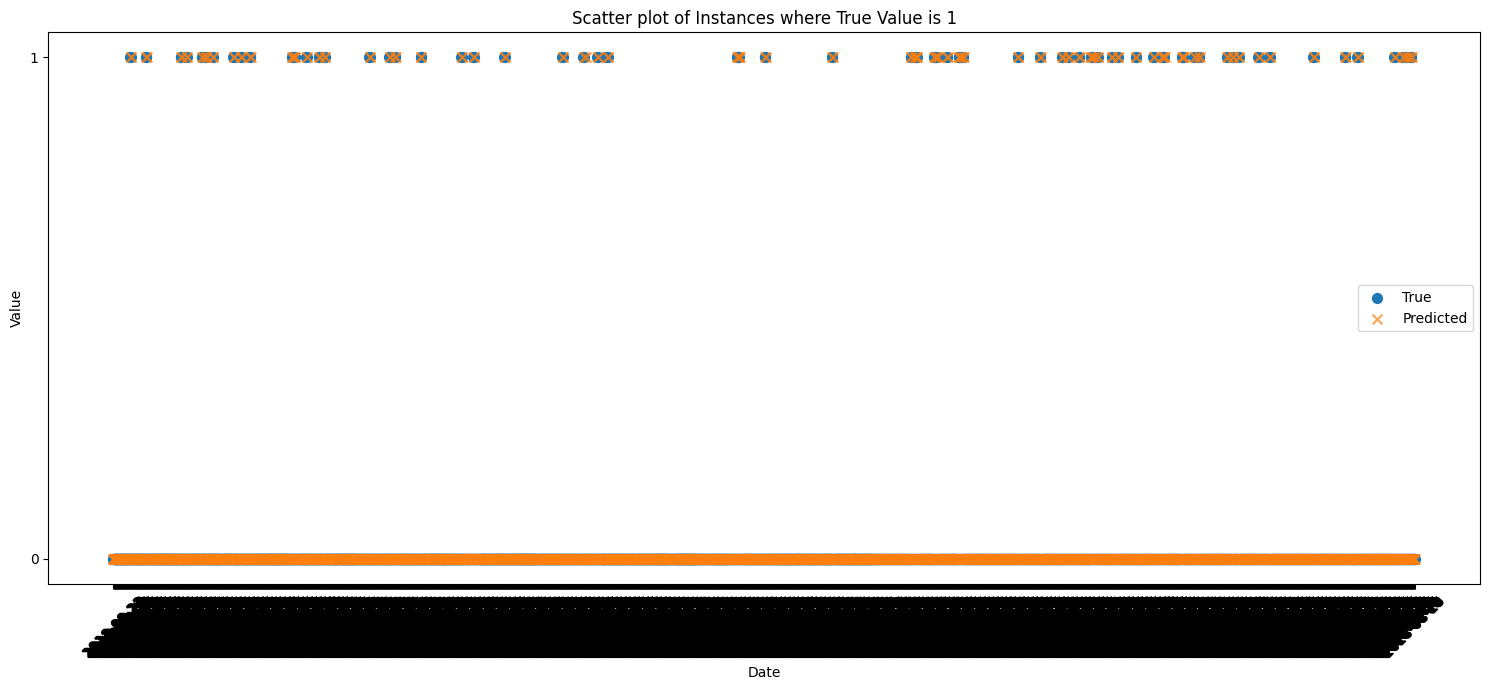

In [177]:
import matplotlib.pyplot as plt
df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
df = df.reset_index(drop=True)
X_test_temp = X_test_temp.reset_index(drop=True)
df['Date'] = X_test_temp['SQLDATE']
df['Date'] = pd.to_datetime(df['Date'].astype(str)).dt.strftime('%Y-%m-%d')
# df.head()
# Scatter plot using the 'Date' column for the x-axis
plt.figure(figsize=(15,7))
plt.scatter(df['Date'], df['True'], label='True', s=50)
plt.scatter(df['Date'], df['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)
plt.title('Scatter plot of Instances where True Value is 1')
plt.ylabel('Value')
plt.xlabel('Date')
plt.yticks([0,1])
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
# plt.savefig('')


In [178]:
# df['Date'] = pd.to_datetime(df['Date'].astype(str)).dt.strftime('%Y-%m-%d')


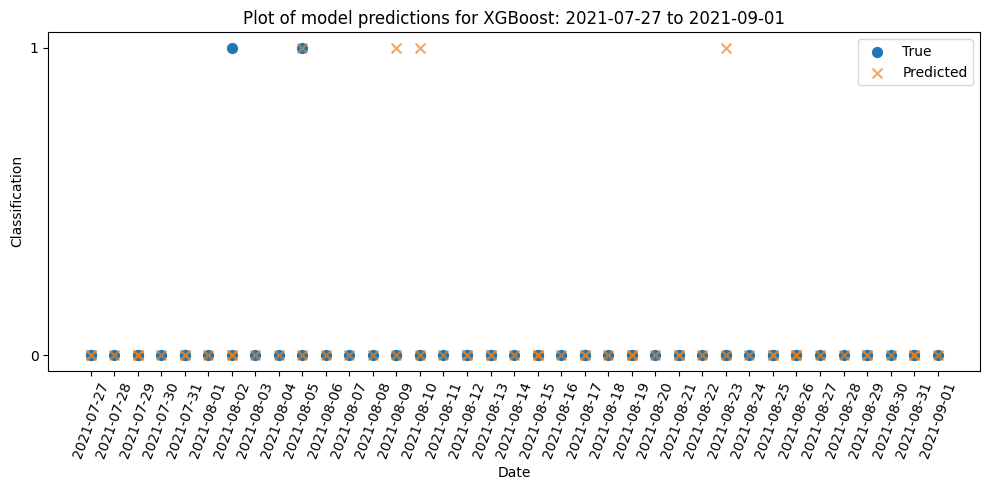

In [196]:
# Filter the DataFrame for the specified date range
start_date = '2021-07-27'
end_date = '2021-09-01'
df_filtered_date_range = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Scatter plot using the 'Date' column for the x-axis within the specified date range
plt.figure(figsize=(10,5))
plt.scatter(df_filtered_date_range['Date'], df_filtered_date_range['True'], label='True', s=50)
plt.scatter(df_filtered_date_range['Date'], df_filtered_date_range['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)



plt.title(f'Plot of model predictions for XGBoost: {start_date} to {end_date}')
plt.ylabel('Classification')
plt.xlabel('Date')
# plt.xticks(df_filtered_date_range['Date'])
plt.yticks([0,1])
plt.legend()
plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('XGBoost model prediction_back_3')
# plt.savefig('')
plt.show()

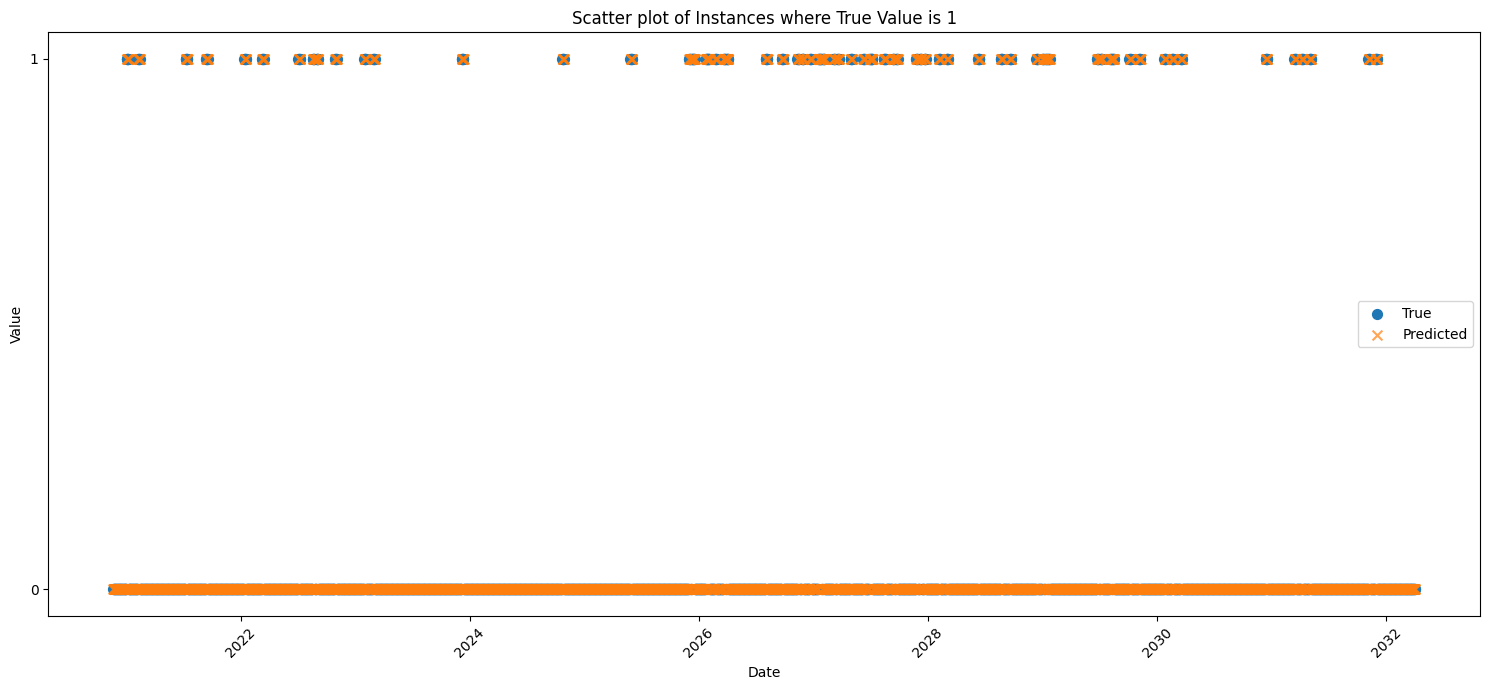

<Figure size 640x480 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
adjusted_date_range = pd.date_range(start='2020/11/21', periods=y_test.size, freq='D')

# Update the dataframe to use the adjusted_date_range as its index
df = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
# Add a new 'Date' column to the dataframe with the adjusted_date_range values
df['Date'] = adjusted_date_range

# Filter for instances where y_test is 1
# df_filtered = df[df['True'] == 1]
df_filtered = df




# Scatter plot using the 'Date' column for the x-axis
plt.figure(figsize=(15,7))
plt.scatter(df_filtered['Date'], df_filtered['True'], label='True', s=50)
plt.scatter(df_filtered['Date'], df_filtered['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)
plt.title('Scatter plot of Instances where True Value is 1')
plt.ylabel('Value')
plt.xlabel('Date')
plt.yticks([0,1])
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
plt.savefig('')


In [2]:
# # Filter the DataFrame for the specified date range
# # start_date = '2022-01-28'
# # end_date = '2022-07-01'
# start_date = 20220128
# end_date = 20220701
# df_filtered_date_range = df_filtered[(df_filtered['Date'] >= start_date) & (df_filtered['Date'] <= end_date)]

# # Scatter plot using the 'Date' column for the x-axis within the specified date range
# plt.figure(figsize=(10,5))
# plt.scatter(df_filtered_date_range['Date'], df_filtered_date_range['True'], label='True', s=50)
# plt.scatter(df_filtered_date_range['Date'], df_filtered_date_range['Predicted'], label='Predicted', s=50, marker='x', alpha=0.7)



# plt.title(f'Plot of model predictions for XGBoost: {start_date} to {end_date}')
# plt.ylabel('Classification')
# plt.xlabel('Date')
# # plt.xticks(df_filtered_date_range['Date'])
# plt.yticks([0,1])
# plt.legend()
# plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
# plt.tight_layout()
# plt.savefig('XGBoost model predictions_back_3')
# plt.show()